In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
all_df = pd.read_excel("data/titanic3.xls")

In [3]:
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]

In [4]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [5]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [6]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [7]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=40, input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [14]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
0s - loss: 0.6899 - acc: 0.5774 - val_loss: 0.6702 - val_acc: 0.7885
Epoch 2/30
0s - loss: 0.6667 - acc: 0.6011 - val_loss: 0.5890 - val_acc: 0.7885
Epoch 3/30
0s - loss: 0.6069 - acc: 0.6688 - val_loss: 0.4927 - val_acc: 0.8077
Epoch 4/30
0s - loss: 0.5413 - acc: 0.7667 - val_loss: 0.4627 - val_acc: 0.7596
Epoch 5/30
0s - loss: 0.5035 - acc: 0.7624 - val_loss: 0.4536 - val_acc: 0.7885
Epoch 6/30
0s - loss: 0.4893 - acc: 0.7634 - val_loss: 0.4400 - val_acc: 0.7788
Epoch 7/30
0s - loss: 0.4813 - acc: 0.7602 - val_loss: 0.4431 - val_acc: 0.7885
Epoch 8/30
0s - loss: 0.4784 - acc: 0.7559 - val_loss: 0.4359 - val_acc: 0.7981
Epoch 9/30
0s - loss: 0.4724 - acc: 0.7624 - val_loss: 0.4282 - val_acc: 0.7981
Epoch 10/30
0s - loss: 0.4693 - acc: 0.7763 - val_loss: 0.4265 - val_acc: 0.8077
Epoch 11/30
0s - loss: 0.4655 - acc: 0.7645 - val_loss: 0.4245 - val_acc: 0.8269
Epoch 12/30
0s - loss: 0.4637 - acc: 0.7742 - val_loss: 0.4206 - val_acc

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

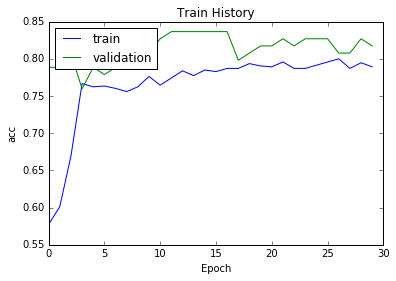

In [17]:
%matplotlib inline 
show_train_history(train_history,'acc','val_acc')

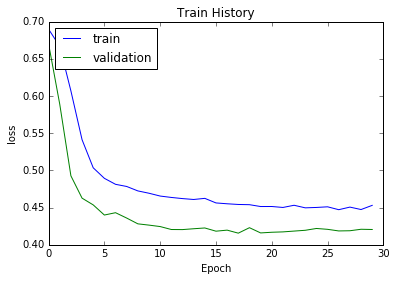

In [18]:
show_train_history(train_history,'loss','val_loss')

In [19]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

 32/275 [==>...........................] - ETA: 0s

In [20]:
scores[1]

0.80000000043348829

In [21]:
Jack = pd.Series([0 ,'Jack',3, 'male'  , 23, 1, 0,  5.0000,'S'])
Rose = pd.Series([1 ,'Rose',1, 'female', 20, 1, 0, 100.0000,'S'])

In [23]:
JR_df = pd.DataFrame([list(Jack),list(Rose)],  
                  columns=['survived', 'name','pclass', 'sex', 
                   'age', 'sibsp','parch', 'fare','embarked'])
all_df=pd.concat([all_df,JR_df])

In [24]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [25]:
all_Features,Label=PreprocessData(all_df)

In [26]:
all_probability=model.predict(all_Features)

In [27]:
all_probability[:10]

array([[ 0.97827601],
       [ 0.58670062],
       [ 0.97385567],
       [ 0.38316706],
       [ 0.97255617],
       [ 0.27358228],
       [ 0.94741738],
       [ 0.32359987],
       [ 0.94570398],
       [ 0.29966399]], dtype=float32)

In [28]:
pd=all_df
pd.insert(len(all_df.columns),
          'probability',all_probability)

In [29]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.149171
1,1,Rose,1,female,20.0,1,0,100.0,S,0.970721


In [30]:
pd[(pd['survived']==0) &  (pd['probability']>0.9) ]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.973856
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.972556
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.980533
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.978090
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.963220


In [31]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.978276
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.586701
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.973856
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.383167
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.972556


In [34]:
pd[(pd['survived']==1) &  (pd['probability']<0.15) ]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
14,1,"Barkworth, Mr. Algernon Henry Wilson",1,male,80.0,0,0,30.0000,S,0.141063
432,1,"Harris, Mr. George",2,male,62.0,0,0,10.5000,S,0.114250
674,1,"Bing, Mr. Lee",3,male,32.0,0,0,56.4958,S,0.134819
714,1,"Chip, Mr. Chang",3,male,32.0,0,0,56.4958,S,0.134819
742,1,"Dahl, Mr. Karl Edwart",3,male,45.0,0,0,8.0500,S,0.112070
746,1,"Daly, Mr. Eugene Patrick",3,male,29.0,0,0,7.7500,Q,0.132650
758,1,"de Messemaeker, Mr. Guillaume Joseph",3,male,36.5,1,0,17.4000,S,0.118991
760,1,"de Mulder, Mr. Theodore",3,male,30.0,0,0,9.5000,S,0.143063
798,1,"Finoli, Mr. Luigi",3,male,NaN,0,0,7.0500,S,0.143574
805,1,"Foo, Mr. Choong",3,male,NaN,0,0,56.4958,S,0.139547
